In [31]:
import requests
import pandas as pd

# API Nana
API_KEY = 'b6b9d811f43f05fc066c564cb0223db6'
cities = ['Bandung', 'Papua', 'Jakarta', 'Majalengka', 'Bekasi', 'Karawang', 'Riau', 'Aceh', 'Bali']

# Get weather data
def get_weather(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric'
    response = requests.get(url)
    return response.json()

weather_data = []
for city in cities:
    data = get_weather(city)
    weather_data.append({
        'City': city,
        'Temperature': data['main']['temp'],
        'Humadity': data['main']['humidity'],
        'Weather': data['weather'][0]['description']
    })

# Save to CSV
df = pd.DataFrame(weather_data)
df.to_csv('weather.csv', index=False)


In [32]:
# EDA
print(df)
df.describe()

         City  Temperature  Humadity           Weather
0     Bandung        24.34        82  scattered clouds
1       Papua        22.33        98   overcast clouds
2     Jakarta        28.49        74  scattered clouds
3  Majalengka        25.60        87     broken clouds
4      Bekasi        28.66        79  scattered clouds
5    Karawang        29.05        80  scattered clouds
6        Riau        25.06        95   overcast clouds
7        Aceh        20.94        97   overcast clouds
8        Bali        26.54        91  scattered clouds


,Temperature,Humadity
count,9.000000,9.000000
mean,25.667778,87.000000
std,2.844911,8.717798
min,20.940000,74.000000
25%,24.340000,80.000000
50%,25.600000,87.000000
75%,28.490000,95.000000
max,29.050000,98.000000


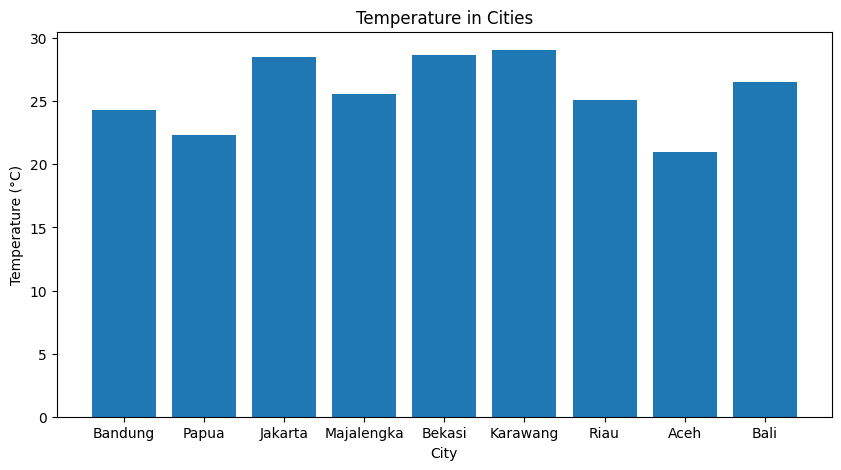

Max Temperature: 29.05°C
Min Temperature: 20.94°C
Avg Temperature: 25.66777777777778°C
City with highest temperature is ['Karawang'] with 29.05°C
City with lowest temperature is ['Aceh'] with 20.94°C
Most of the weather is scattered clouds


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV
df = pd.read_csv('weather.csv')

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Temperature'])
plt.title('Temperature in Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()

# Max Temperature
max_temp = df['Temperature'].max()
print(f'Max Temperature: {max_temp}°C')

# Lowest Temperature
min_temp = df['Temperature'].min()
print(f'Min Temperature: {min_temp}°C')

# Avg Temperature
avg_temp = df['Temperature'].mean()
print(f'Avg Temperature: {avg_temp}°C')

# Cities with highest temperature
max_temp_city = df[df['Temperature'] == max_temp]['City'].values
print(f'City with highest temperature is {max_temp_city} with {max_temp}°C')

# Cities with lowest temperature
min_temp_city = df[df['Temperature'] == min_temp]['City'].values    
print(f'City with lowest temperature is {min_temp_city} with {min_temp}°C')

# Most weather
most_weather = df['Weather'].value_counts().idxmax()
print(f'Most of the weather is {most_weather}')


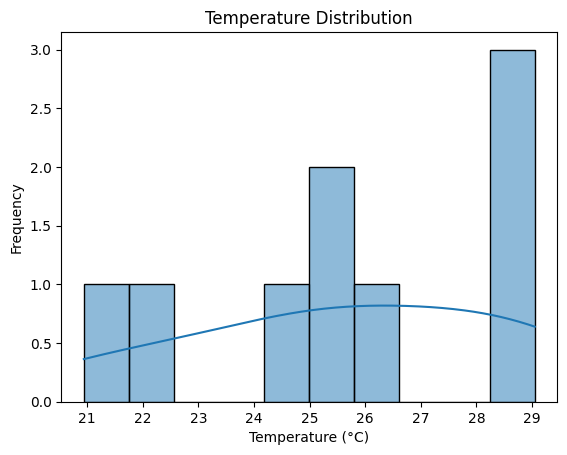

Data city dan temperature:
         City  Temperature
0     Bandung        24.34
1       Papua        22.33
2     Jakarta        28.49
3  Majalengka        25.60
4      Bekasi        28.66
5    Karawang        29.05
6        Riau        25.06
7        Aceh        20.94
8        Bali        26.54


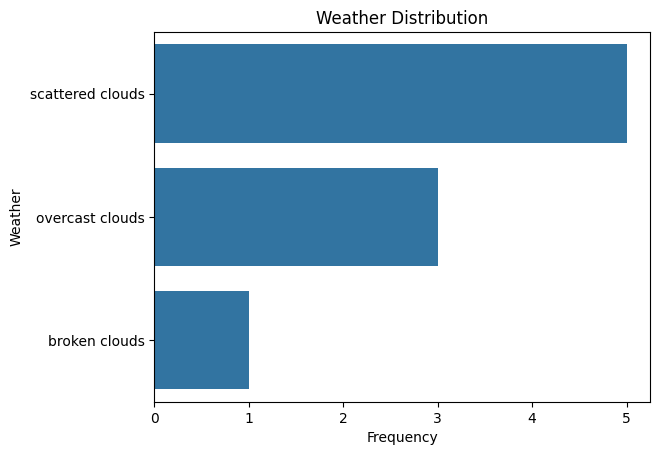

Data city dan weather:
         City           Weather
0     Bandung  scattered clouds
1       Papua   overcast clouds
2     Jakarta  scattered clouds
3  Majalengka     broken clouds
4      Bekasi  scattered clouds
5    Karawang  scattered clouds
6        Riau   overcast clouds
7        Aceh   overcast clouds
8        Bali  scattered clouds


In [34]:
# Visualize Data
# Visualize Temperature Distribution
sns.histplot(df['Temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

print("Data city dan temperature:")
print(df[['City', 'Temperature']])

# Visualize Weather Distribution
sns.countplot(y='Weather', data=df)
plt.title('Weather Distribution')
plt.xlabel('Frequency')
plt.ylabel('Weather')
plt.show()

print('Data city dan weather:')
print(df[['City','Weather']])
